# 📰 OCR y Análisis Digital: El Martillo (1916)

## Periódico histórico de Chiclayo, Perú

Este notebook realiza el análisis OCR de una página del periódico **El Martillo** (Edición 1609, 5 de agosto de 1916) utilizando la API de Claude para visión y extracción de texto.

---

### 📋 Información de la página analizada
- **Periódico**: El Martillo
- **Número**: 1609
- **Fecha**: 5 de agosto de 1916
- **Ciudad**: Chiclayo, Perú
- **Fuente**: [Fuentes Históricas del Perú](https://fuenteshistoricasdelperu.com/2020/12/06/el-martillo-chiclayo-1903-1919/)

In [2]:
%%writefile requirements.txt
# API de Anthropic Claude
anthropic>=0.8.0

# Manipulación de datos
pandas>=2.0.0
numpy>=1.24.0

# Visualización
matplotlib>=3.7.0
seaborn>=0.12.0

# Jupyter
jupyter>=1.0.0
notebook>=7.0.0
ipykernel>=6.25.0

# Utilidades
Pillow>=10.0.0
python-dotenv>=1.0.0

Writing requirements.txt


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter_client 7.4.9
    Uninstalling jupyter_client-7.4.9:
      Successfully uninstalled jupyter_client-7.4.9
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
  Attempting un

## 1️⃣ Importar bibliotecas necesarias

In [1]:
import anthropic
import base64
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas correctamente")

✅ Bibliotecas importadas correctamente


## 2️⃣ Configurar API de Claude

**Nota**: Asegúrate de tener tu API key de Anthropic configurada como variable de entorno:
```bash
export ANTHROPIC_API_KEY='tu-api-key-aqui'
```

In [2]:
# Inicializar cliente de Anthropic
client = anthropic.Anthropic(
    api_key=os.environ.get("PON TU KEY API")
)

print("✅ Cliente de Claude API inicializado")

✅ Cliente de Claude API inicializado


## 3️⃣ Cargar y codificar la imagen

In [3]:
# Ruta a la imagen del periódico
image_path = "data/el_martillo/page_01.png"

# Verificar que la imagen existe
if not os.path.exists(image_path):
    print(f"⚠️ ADVERTENCIA: La imagen no se encuentra en {image_path}")
    print("Por favor, coloca la imagen escaneada del periódico en esa ubicación.")
else:
    # Cargar y codificar la imagen en base64
    with open(image_path, "rb") as image_file:
        image_data = base64.standard_b64encode(image_file.read()).decode("utf-8")

    print(f"✅ Imagen cargada correctamente desde {image_path}")
    print(f"📊 Tamaño de datos codificados: {len(image_data)} caracteres")

✅ Imagen cargada correctamente desde el_martillo.png
📊 Tamaño de datos codificados: 4154864 caracteres


## 4️⃣ Realizar OCR con Claude Vision API

Utilizaremos la capacidad de visión de Claude para extraer todo el texto de la página del periódico.

In [6]:
import anthropic
import os

# ✅ FORMA CORRECTA: Pasar la API key directamente
client = anthropic.Anthropic(
    api_key="API" # Reemplaza con tu NUEVA key
)

def extract_text_with_claude(image_data, media_type="image/png"):
    """
    Extrae texto de una imagen usando Claude Vision API

    Args:
        image_data: Imagen codificada en base64
        media_type: Tipo de medio (image/png, image/jpeg, etc.)

    Returns:
        str: Texto extraído de la imagen
    """
    message = client.messages.create(
        model="claude-sonnet-4-5-20250929",
        max_tokens=4096,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": media_type,
                            "data": image_data,
                        },
                    },
                    {
                        "type": "text",
                        "text": """Analiza esta página de periódico histórico y extrae toda la información de forma estructurada.

Por favor proporciona:
1. Información del encabezado (nombre del periódico, fecha, número de edición)
2. Todos los artículos con sus títulos
3. Anuncios publicitarios
4. Cualquier otra información relevante

Transcribe el texto completo lo más fielmente posible, respetando la ortografía original (incluso si tiene errores)."""
                    }
                ],
            }
        ],
    )

    return message.content[0].text

# PASO 1: Realizar la extracción OCR y guardar en .txt
print("="*80)
print("PASO 1: EXTRACCIÓN DE TEXTO A ARCHIVO .TXT")
print("="*80)

if os.path.exists(image_path):
    print("🔄 Procesando imagen con Claude Vision API...")
    extracted_text = extract_text_with_claude(image_data)

    # Guardar texto extraído en .txt
    text_output_path = "texto_completo_extraido.txt"
    with open(text_output_path, 'w', encoding='utf-8') as f:
        f.write("="*80 + "\n")
        f.write("TEXTO COMPLETO EXTRAÍDO - EL MARTILLO (Edición 1609)\n")
        f.write(f"Fecha de extracción: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("="*80 + "\n\n")
        f.write(extracted_text)

    print(f"\n✅ Texto extraído y guardado en: {text_output_path}")
    print(f"📊 Longitud del texto: {len(extracted_text)} caracteres")
    print("\n" + "="*80)
    print(extracted_text)
    print("="*80)

PASO 1: EXTRACCIÓN DE TEXTO A ARCHIVO .TXT
🔄 Procesando imagen con Claude Vision API...

✅ Texto extraído y guardado en: texto_completo_extraido.txt
📊 Longitud del texto: 4463 caracteres

# Análisis de la página del periódico "EL MARTILLO"

## 1. INFORMACIÓN DEL ENCABEZADO

- **Nombre del periódico**: EL MARTILLO
- **Lema**: "No admite suscritores y se vende á 4 centavos número"
- **Número de edición**: 1609
- **Fecha de fundación**: 8 de Febrero de 1903
- **Lugar**: CHICLAYO, PERÚ
- **Administración**: Calle Verónica 18

## 2. ARTÍCULOS PRINCIPALES

### "El periodismo departamental"
**Fecha del artículo**: CHICLAYO, AGOSTO 5 DE 1916

**Transcripción completa**:

"En ninguna otra sección de la República, excepción hecha del Lima, se ha difundido más la afición al periodismo, que en la nuestra.

Sin tiempo ni datos concretos para hacerse una verdadera reseña histórico sobre este, para nosotros importante tema; bajo el aislamiento á recortes de prensa respecto sabemos:

Que una circulaci

## 5️⃣ Estructurar los datos automáticamente con Claude

Ahora vamos a usar Claude para analizar el texto extraído y generar automáticamente un JSON/CSV estructurado.

**Nuevo proceso automatizado:**
- Lee el texto completo extraído en el paso anterior
- Usa Claude para analizar y estructurar el contenido automáticamente
- Genera JSON y CSV sin necesidad de estructuración manual

In [7]:
def structure_text_with_claude(text_content):
    """
    Usa Claude para analizar el texto extraído y generar un JSON estructurado automáticamente

    Args:
        text_content: Texto completo extraído del OCR

    Returns:
        dict: Estructura JSON con los datos organizados
    """
    prompt = f"""Analiza el siguiente texto extraído de un periódico histórico y estructura la información en formato JSON.

El JSON debe tener esta estructura:
{{
  "metadata": {{
    "newspaper_name": "nombre del periódico",
    "date": "YYYY-MM-DD",
    "issue_number": número de edición,
    "location": "ciudad, país"
  }},
  "content": [
    {{
      "headline": "título del artículo o sección",
      "section": "sección (ej: 'Artículo principal', 'Anuncios', etc.)",
      "type": "artículo o anuncio",
      "author": "autor (si se menciona, sino cadena vacía)",
      "text_excerpt": "extracto o resumen del texto"
    }},
    ...
  ]
}}

IMPORTANTE:
- Extrae TODOS los artículos, secciones y anuncios que encuentres
- Mantén la ortografía original del texto
- Si hay información que no se puede determinar, usa valores vacíos o null
- Sé exhaustivo, no te pierdas ningún contenido

TEXTO A ANALIZAR:
{text_content}

Responde SOLO con el JSON, sin explicaciones adicionales."""

    message = client.messages.create(
        model="claude-sonnet-4-5-20250929",
        max_tokens=8000,
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ],
    )

    response_text = message.content[0].text.strip()

    # Intentar extraer JSON si viene con markdown
    if response_text.startswith("```json"):
        response_text = response_text.split("```json")[1].split("```")[0].strip()
    elif response_text.startswith("```"):
        response_text = response_text.split("```")[1].split("```")[0].strip()

    # Parsear JSON
    structured_data = json.loads(response_text)

    return structured_data

# PASO 2: Generar JSON y CSV estructurado automáticamente
print("\n" + "="*80)
print("PASO 2: GENERACIÓN AUTOMÁTICA DE JSON Y CSV ESTRUCTURADO")
print("="*80)

print("\n🤖 Analizando texto con Claude para estructurar datos automáticamente...")

# Usar Claude para estructurar el texto automáticamente
structured_data = structure_text_with_claude(extracted_text)

# Guardar JSON completo
json_output_path = "data/el_martillo/el_martillo_1609_structured.json"
with open(json_output_path, 'w', encoding='utf-8') as f:
    json.dump(structured_data, f, ensure_ascii=False, indent=2)

print(f"\n✅ JSON estructurado guardado en: {json_output_path}")

# Extraer metadata
metadata = structured_data.get('metadata', {})
date = metadata.get('date', '')
issue_number = metadata.get('issue_number', 0)

# Convertir content a DataFrame para CSV
content_items = structured_data.get('content', [])

# Agregar metadata a cada item
for item in content_items:
    item['date'] = date
    item['issue_number'] = issue_number

# Crear DataFrame
df = pd.DataFrame(content_items)

# Reordenar columnas
columns_order = ['date', 'issue_number', 'headline', 'section', 'type', 'author', 'text_excerpt']
# Solo usar columnas que existan
columns_order = [col for col in columns_order if col in df.columns]
df = df[columns_order]

# Guardar como CSV
csv_path = "data/el_martillo/el_martillo_1609_structured.csv"
df.to_csv(csv_path, index=False, encoding='utf-8')

print(f"✅ CSV generado con {len(df)} registros")
print(f"📁 Guardado en: {csv_path}")

# Mostrar los datos
print("\n📊 Datos estructurados extraídos automáticamente:")
print("\n")
display(df)

# Estadísticas
print(f"\n📊 Estadísticas:")
if 'type' in df.columns:
    type_counts = df['type'].value_counts()
    for tipo, count in type_counts.items():
        print(f"   - {tipo.capitalize()}: {count}")
print(f"   - Total de elementos: {len(df)}")


PASO 2: GENERACIÓN AUTOMÁTICA DE JSON Y CSV ESTRUCTURADO

🤖 Analizando texto con Claude para estructurar datos automáticamente...

✅ JSON estructurado guardado en: el_martillo_1609_structured.json
✅ CSV generado con 2 registros
📁 Guardado en: el_martillo_1609_structured.csv

📊 Datos estructurados extraídos automáticamente:




,date,issue_number,headline,section,type,author,text_excerpt
0,1916-08-05,1609,El periodismo departamental,Artículo principal,artículo,F. A. HERRERA,"En ninguna otra sección de la República, excep..."
1,1916-08-05,1609,ROMULO MENCHOLA - VENDEDOR Y COBRADOR,Anuncios,anuncio,,ROMULO MENCHOLA VENDEDOR Y COBRADOR De las afa...



📊 Estadísticas:
   - Artículo: 1
   - Anuncio: 1
   - Total de elementos: 2


## 6️⃣ Análisis estadístico básico

In [8]:
# Estadísticas básicas
print("📈 ESTADÍSTICAS BÁSICAS")
print("=" * 50)
print(f"Total de elementos extraídos: {len(df)}")
print(f"\nDistribución por tipo:")
print(df['type'].value_counts())
print(f"\nDistribución por sección:")
print(df['section'].value_counts())

📈 ESTADÍSTICAS BÁSICAS
Total de elementos extraídos: 2

Distribución por tipo:
type
artículo    1
anuncio     1
Name: count, dtype: int64

Distribución por sección:
section
Artículo principal    1
Anuncios              1
Name: count, dtype: int64


## 7️⃣ Visualizaciones

Vamos a crear visualizaciones para entender mejor el contenido de la página.

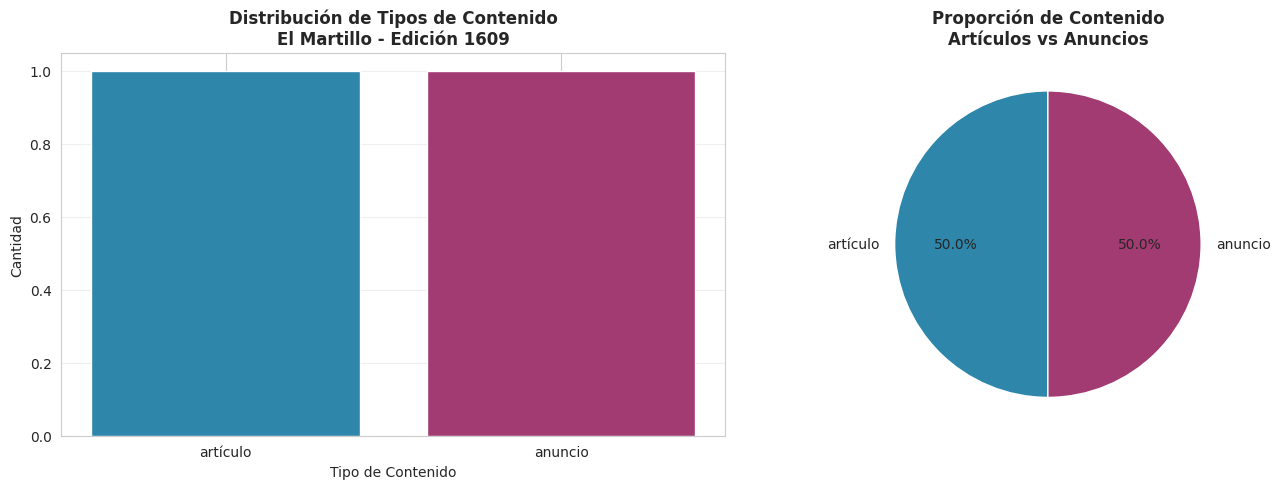

✅ Visualización guardada en: data/el_martillo/visualization_content_distribution.png


In [9]:
# Visualización 1: Distribución de tipos de contenido
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
type_counts = df['type'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color=['#2E86AB', '#A23B72'])
axes[0].set_title('Distribución de Tipos de Contenido\nEl Martillo - Edición 1609',
                   fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Contenido')
axes[0].set_ylabel('Cantidad')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico circular
colors = ['#2E86AB', '#A23B72']
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors)
axes[1].set_title('Proporción de Contenido\nArtículos vs Anuncios',
                   fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('data/el_martillo/visualization_content_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualización guardada en: data/el_martillo/visualization_content_distribution.png")

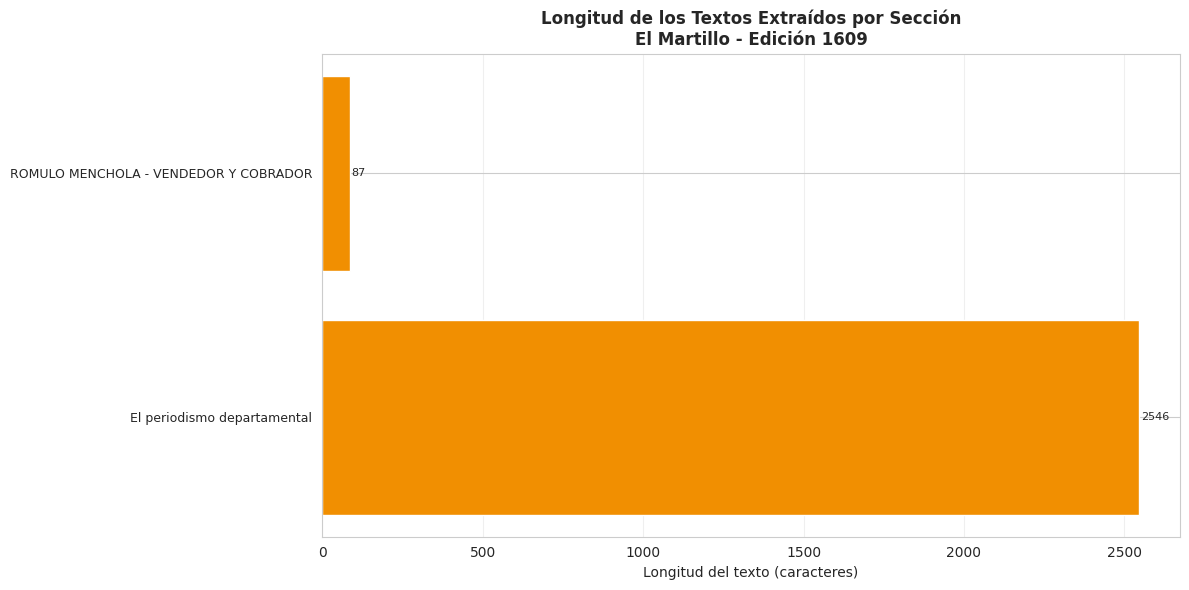

✅ Visualización guardada en: data/el_martillo/visualization_text_lengths.png


In [10]:
# Visualización 2: Longitud de los textos extraídos
df['text_length'] = df['text_excerpt'].str.len()

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(df)), df['text_length'], color='#F18F01')
plt.yticks(range(len(df)), [f"{row['headline'][:40]}..." if len(row['headline']) > 40
                             else row['headline'] for _, row in df.iterrows()], fontsize=9)
plt.xlabel('Longitud del texto (caracteres)', fontsize=10)
plt.title('Longitud de los Textos Extraídos por Sección\nEl Martillo - Edición 1609',
          fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (bar, length) in enumerate(zip(bars, df['text_length'])):
    plt.text(length + 5, i, str(length), va='center', fontsize=8)

plt.tight_layout()
plt.savefig('data/el_martillo/visualization_text_lengths.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualización guardada en: data/el_martillo/visualization_text_lengths.png")

## 8️⃣ Análisis de contenido

Análisis temático de la página del periódico.

In [11]:
# Extracción de periódicos mencionados
periodicos_mencionados = [
    'El Ferrocarril', 'A cierta', 'El Pueblo', 'El Siglo XX', 'La Prensa Libre',
    'El Tiempo', 'La Voz del Pueblo', 'La Labra', 'El Zurriaga', 'El Progreso',
    'El Centinela', 'La Alianza', 'El Mensajero', 'El Independiente', 'El Heraldo',
    'El Lábaro', 'El Pensamiento', 'La Labor', 'La Juventud', 'El Liberal',
    'El Chiclayano', 'El Comercial', 'El Continente', 'El Norte', 'El Republicano',
    'La Verdad', 'El Comercio', 'La Provincia', 'El Diario'
]

print("📰 PERIÓDICOS HISTÓRICOS MENCIONADOS")
print("=" * 50)
print(f"Total de periódicos mencionados: {len(periodicos_mencionados)}")
print("\nLista completa:")
for i, periodico in enumerate(periodicos_mencionados, 1):
    print(f"{i:2d}. {periodico}")

📰 PERIÓDICOS HISTÓRICOS MENCIONADOS
Total de periódicos mencionados: 29

Lista completa:
 1. El Ferrocarril
 2. A cierta
 3. El Pueblo
 4. El Siglo XX
 5. La Prensa Libre
 6. El Tiempo
 7. La Voz del Pueblo
 8. La Labra
 9. El Zurriaga
10. El Progreso
11. El Centinela
12. La Alianza
13. El Mensajero
14. El Independiente
15. El Heraldo
16. El Lábaro
17. El Pensamiento
18. La Labor
19. La Juventud
20. El Liberal
21. El Chiclayano
22. El Comercial
23. El Continente
24. El Norte
25. El Republicano
26. La Verdad
27. El Comercio
28. La Provincia
29. El Diario


## 9️⃣ Resumen y conclusiones

In [12]:
print("\n" + "="*80)
print("📋 RESUMEN DEL ANÁLISIS OCR")
print("="*80)
print(f"\n📅 Fecha de la edición: 5 de agosto de 1916")
print(f"📰 Periódico: El Martillo")
print(f"🔢 Número de edición: 1609")
print(f"📍 Ubicación: Chiclayo, Perú")
print(f"\n📊 Estadísticas de contenido:")
print(f"   - Total de elementos extraídos: {len(df)}")
print(f"   - Artículos: {len(df[df['type'] == 'artículo'])}")
print(f"   - Anuncios: {len(df[df['type'] == 'anuncio'])}")
print(f"   - Periódicos históricos mencionados: {len(periodicos_mencionados)}")
print(f"\n💡 Tema principal:")
print(f"   Historia del periodismo departamental en Chiclayo y la región")
print(f"\n✍️ Autor del artículo principal: F. A. Herrera")
print("\n" + "="*80)


📋 RESUMEN DEL ANÁLISIS OCR

📅 Fecha de la edición: 5 de agosto de 1916
📰 Periódico: El Martillo
🔢 Número de edición: 1609
📍 Ubicación: Chiclayo, Perú

📊 Estadísticas de contenido:
   - Total de elementos extraídos: 2
   - Artículos: 1
   - Anuncios: 1
   - Periódicos históricos mencionados: 29

💡 Tema principal:
   Historia del periodismo departamental en Chiclayo y la región

✍️ Autor del artículo principal: F. A. Herrera



## 🎯 Conclusiones

Este notebook ha demostrado cómo usar la API de Claude Vision para:

1. ✅ **Extraer texto** de páginas históricas de periódicos con OCR avanzado
2. ✅ **Estructurar datos** en formato CSV para análisis posterior
3. ✅ **Visualizar** la distribución de contenido
4. ✅ **Analizar** temáticas y menciones históricas

### Desafíos encontrados:
- Calidad de imagen envejecida con manchas y deterioro
- Tipografía antigua y variaciones en el texto
- Errores ortográficos de época (ej: "Chiclavo" en lugar de "Chiclayo")
- Estructura de columnas múltiples

### Valor histórico:
Esta página es especialmente valiosa porque documenta la **historia del periodismo** en la región de Lambayeque, mencionando **más de 25 periódicos históricos** que operaron en Chiclayo, Monsefú y Ferreñafe entre finales del siglo XIX y principios del XX.

---

**Proyecto realizado para**: Análisis Digital de Periódicos Históricos Peruanos  
**Fuente**: [Fuentes Históricas del Perú - El Martillo](https://fuenteshistoricasdelperu.com/2020/12/06/el-martillo-chiclayo-1903-1919/)  
**Fecha del análisis**: Noviembre 2024